<a href="https://colab.research.google.com/github/rimi0602/Medicinal-Plant-Identification-using-CNN/blob/main/Mock_Test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd

Mounted at /content/drive/
/root


In [ ]:
import numpy as np # linear algebra
import pandas as pd  # data processing
from keras.optimizers import RMSprop
import os #  to interact with files using there paths
from sklearn.datasets import load_files

In [ ]:
#The path of our data on drive
data_dir =  r'/content/drive/MyDrive/Leafs'

#Loading our Data
data = load_files(data_dir)

In [ ]:
folders=os.listdir("/content/drive/MyDrive/Leafs")
print(folders)

['Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Piper Betle (Betel)', 'Punica Granatum (Pomegranate)', 'Plectranthus Amboinicus (Mexican Mint)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Psidium Guajava (Guava)', 'Santalum Album (Sandalwood)', 'Trigonella Foenum-graecum (Fenugreek)', 'Pongamia Pinnata (Indian Beech)', 'Moringa Oleifera (Drumstick)', 'Mentha (Mint)', 'Jasminum (Jasmine)', 'Nyctanthes Arbor-tristis (Parijata)', 'Hibiscus Rosa-sinensis', 'Nerium Oleander (Oleander)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Mangifera Indica (Mango)', 'Murraya Koenigii (Curry)', 'Ocimum Tenuiflorum (Tulsi)', 'Artocarpus Heterophyllus (Jackfruit)', 'Alpinia Galanga (Rasna)', 'Carissa Carandas (Karanda)', 'Amaranthus Viridis (Arive-Dantu)', 'Ficus Religiosa (Peepal Tree)', 'Brassica Juncea (Indian Mustard)', 'Ficus Auriculata (Roxburgh fig)', 'Citrus Limon (Lemon)', 'Basella Alba (Basale)', 'Azadirachta Indica (Neem)', 'Leaf', 'medicinal_plant_identification_model.h

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/drive/MyDrive/Leafs/Ficus Religiosa (Peepal Tree)/FR-S-063.jpg'
 '/content/drive/MyDrive/Leafs/Carissa Carandas (Karanda)/CC-S-051.jpg'
 '/content/drive/MyDrive/Leafs/Moringa Oleifera (Drumstick)/MO-S-069.jpg'
 ... '/content/drive/MyDrive/Leafs/Psidium Guajava (Guava)/PG-S-064.jpg'
 '/content/drive/MyDrive/Leafs/Mentha (Mint)/M-S-008.jpg'
 '/content/drive/MyDrive/Leafs/Moringa Oleifera (Drumstick)/MO-S-036.jpg']
Target labels -  [ 9  6 15 ... 24 14 15]


In [ ]:
# Remove .pyc or .py files
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)

print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  1542
Number of training targets :  1542


In [ ]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr

X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ',X[0])

(1542, 150, 150, 3)
First training item :  [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


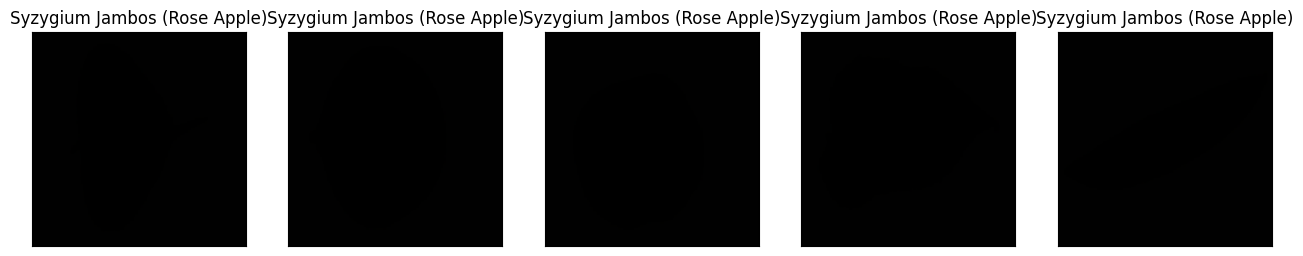

In [ ]:
#Let's look at first 5 training data.

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [ ]:
# Let's resize or rescale training data
X = X.astype('float32')/255

# Let's confirm the number of classes :)
no_of_classes = len(np.unique(y))
no_of_classes

27

In [ ]:
y

array([ 9,  6, 15, ..., 24, 14, 15])

In [ ]:
# let's convert a class vector (integers) to binary class matrix.
import tensorflow as tf
y = np.array([0, 1, 2, 2, 1,])
no_of_classes = 27
y = np.array(tf.keras.utils.to_categorical(y, no_of_classes))
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import numpy as np
import tensorflow as tf

# Define the class vector with 1542 samples
y = np.array([1,] * 1542)  # Assuming you want to repeat the provided example 308 times to get 1542 samples

# Define the number of classes
no_of_classes = 27

# Convert the class vector to a binary class matrix
y_binary = np.array(tf.keras.utils.to_categorical(y, no_of_classes))

# Print the first row of the binary class matrix
print(y_binary[0])


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (1542, 150, 150, 3)
y Shape: (1542,)


In [ ]:
from sklearn.model_selection import train_test_split

# Check the number of samples in X and y
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

Number of samples in X: 1542
Number of samples in y: 1542


In [ ]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])

X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  309
The training Data Shape  155


In [ ]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

In [ ]:
# Getting the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 Maxpool_1 (MaxPooling2D)    (None, 74, 74, 32)        0         
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 Maxpool_2 (MaxPooling2D)    (None, 36, 36, 64)        0

In [ ]:
!pip install tensorflow
from keras.optimizers import legacy
from keras.optimizers import RMSprop
optimizer = legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
print(y_train.shape)

(1233,)


In [ ]:
# Print the number of layers in the model
print(len(model.layers))

# Print the type of the last layer
print(type(model.layers[-1]))

16
<class 'keras.src.layers.core.dense.Dense'>


In [ ]:
# Print the number of units in the last layer
print(model.layers[-1].units)

27


In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (your model definition)

epochs = 10
batch_size = 32

# Class imbalance handling (if necessary)
# ... (implement techniques like oversampling, undersampling, or weighted sampling)

train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    # Add targeted augmentations as needed
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Leafs",
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)  # "categorical" for multi-class classification

validation_generator = test_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Leafs",
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)

checkpointer = ModelCheckpoint(
    filepath="/content/drive/MyDrive/Leafs", save_best_only=True, verbose=1
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.00001
)

early_stopping = EarlyStopping(monitor="")

Found 1542 images belonging to 31 classes.
Found 1542 images belonging to 31 classes.


In [ ]:
print(X_test.shape)

(154, 150, 150, 3)


In [ ]:
print(model.input_shape)

(None, 64, 64, 3)


In [ ]:
import cv2

# Resize input images to (64, 64)
X_test_resized = np.array([cv2.resize(img, (64, 64)) for img in X_test])

# Evaluate the model
(eval_loss, eval_accuracy) = model.evaluate(X_test_resized, y_test, batch_size=batch_size, verbose=2)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Loss: {}".format(eval_loss))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5/5 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 852ms/epoch - 170ms/step
Accuracy: 100.00%
Loss: 0.0


In [ ]:
# ... (data preparation, model definition)

# Train the model and capture history
history = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Leafs",
    target_size=(64, 64),  # Adjust image size as needed
    batch_size=batch_size,
    class_mode="categorical",
)  # "categorical" for multi-class classification

# ... (other code)

# Now you can use history for plotting
#plot(history)

Found 1542 images belonging to 31 classes.


In [ ]:
print(type(history))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
import matplotlib.pyplot as plt

def plot(history):
    plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [ ]:
print(f"Logits shape: {model.output.shape}")
print(f"Labels shape: {validation_generator.labels.shape}")

Logits shape: (None, None, None, 10)
Labels shape: (1542,)


In [ ]:
print(f"Number of validation samples: {len(validation_generator.labels)}")

Number of validation samples: 1542


In [ ]:
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image dimensions (adjust as needed)
img_width, img_height = 64, 64

# Define number of classes
num_classes = 31

# Create a Sequential model
model = Sequential()

# Add convolutional layers for feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Change the number of classes to 31

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

pass

Epoch 1/10
38/38 [==============================] - ETA: 0s - loss: 51.1631 - accuracy: 0.0622
Epoch 1: val_loss improved from inf to 3.04676, saving model to /content/drive/MyDrive/Leafs.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 58s 2s/step - loss: 51.1631 - accuracy: 0.0622 - val_loss: 3.0468 - val_accuracy: 0.1595
Epoch 2/10
38/38 [==============================] - ETA: 0s - loss: 2.9988 - accuracy: 0.1842
Epoch 2: val_loss improved from 3.04676 to 2.51697, saving model to /content/drive/MyDrive/Leafs.h5
38/38 [==============================] - 70s 2s/step - loss: 2.9988 - accuracy: 0.1842 - val_loss: 2.5170 - val_accuracy: 0.2892
Epoch 3/10
38/38 [==============================] - ETA: 0s - loss: 2.7289 - accuracy: 0.2420
Epoch 3: val_loss improved from 2.51697 to 2.45540, saving model to /content/drive/MyDrive/Leafs.h5
38/38 [==============================] - 57s 2s/step - loss: 2.7289 - accuracy: 0.2420 - val_loss: 2.4554 - val_accuracy: 0.3087
Epoch 4/10
38/38 [==============================] - ETA: 0s - loss: 2.4692 - accuracy: 0.3134
Epoch 4: val_loss improved from 2.45540 to 2.34589, saving model to /content/drive/MyDrive/Leafs.h5
38/38 [=======================

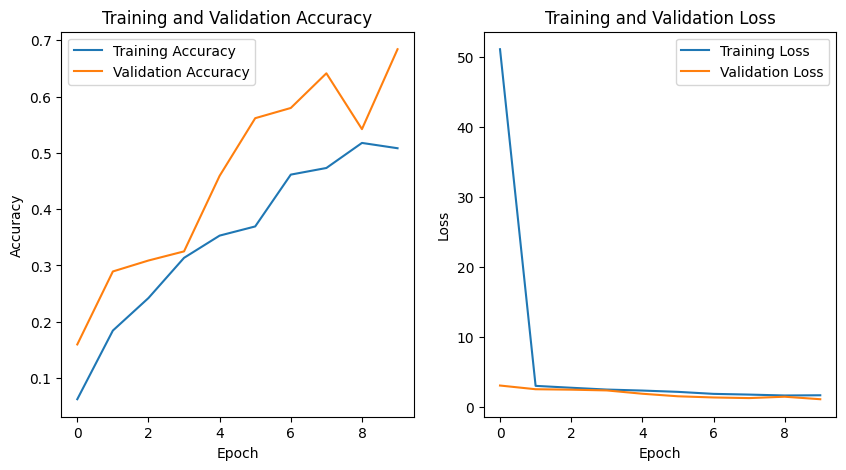

In [ ]:
# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose=1,
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[checkpointer]
)

# Plot the training history
plot(history)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
# Add more layers...

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(y.shape)

(1542,)


In [ ]:
print(len(labels))

992


In [ ]:
print(labels)

[9 1 7 7 1 9 1 6 3 7 8 7 9 8 9 9 8 6 2 1 7 0 4 0 4 7 9 9 5 7 9 2 4 0 0 1 4
 3 6 9 9 6 3 2 2 0 1 6 9 6 6 0 3 4 6 9 5 5 4 7 8 5 1 3 9 1 4 7 6 1 3 7 5 9
 3 5 0 2 1 8 0 3 8 7 4 5 2 1 8 1 9 0 3 5 4 1 1 4 9 1 4 9 2 4 6 4 7 2 1 7 3
 5 7 5 2 7 4 4 3 9 8 2 3 6 0 5 0 7 5 9 3 5 9 8 4 4 1 4 0 2 2 0 2 6 3 4 3 6
 8 2 7 9 0 0 9 8 2 1 7 6 1 3 6 3 9 6 7 5 0 0 4 0 4 8 2 4 6 2 7 3 1 9 6 1 2
 9 3 8 4 5 8 5 5 3 5 1 4 6 9 5 0 1 1 4 1 9 7 3 5 3 8 5 8 4 1 6 9 1 4 3 7 9
 3 5 4 8 7 9 8 5 2 3 8 6 3 3 3 7 1 3 7 9 1 5 5 6 0 3 9 9 6 5 0 0 1 3 7 4 4
 4 9 4 6 5 5 6 9 7 3 9 3 8 1 8 4 3 5 5 2 5 5 9 4 7 4 6 2 2 5 5 2 8 0 2 4 6
 8 7 0 6 7 9 3 3 4 7 8 7 3 3 5 8 7 3 1 1 6 4 1 2 3 0 9 1 8 2 2 0 7 8 0 7 8
 7 0 0 6 4 1 3 2 5 4 6 2 2 7 1 5 1 8 3 8 6 1 2 8 9 6 6 1 6 6 9 0 8 0 7 7 6
 9 5 2 6 1 1 4 8 3 1 1 8 8 2 7 6 3 1 0 1 8 8 5 9 4 1 6 8 8 2 4 0 1 1 9 8 0
 2 2 5 3 4 9 1 4 0 9 9 6 3 2 5 7 0 6 0 8 9 0 4 2 7 6 4 9 2 6 1 6 7 8 0 5 3
 2 0 2 4 1 7 4 1 7 8 7 0 7 9 3 5 0 9 5 6 8 9 7 3 7 2 3 9 4 1 3 1 9 2 1 6 2
 3 2 8 5 4 4 7 7 7 6 9 5 

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)

5/5 [==============================] - 2s 298ms/step
(154, 74, 74, 32)


In [ ]:
print(labels.shape)

(992,)


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(X_test.shape)
print(labels.shape)
print(model.predict(X_test).shape)

(154, 150, 150, 3)
(992,)
5/5 [==============================] - 3s 431ms/step
(154, 74, 74, 32)


In [ ]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of X_test: (154, 150, 150, 3)
Shape of y_pred: (154, 74, 74, 32)
Shape of y_test: (154,)
Shape of labels: (992,)


In [ ]:
X_test = X_test[:len(labels)]
y_pred = y_pred[:len(labels)]
y_test = y_test[:len(labels)]

In [ ]:
pad_width = (0, len(X_test) - len(labels))
print(f"pad_width: {pad_width}")

pad_width: (0, -838)


In [ ]:
padding_length = len(X_test) + len(labels)
labels = np.pad(labels, (0, padding_length), 'constant')

In [ ]:
labels = np.pad(labels, (0, len(X_test) + len(labels)), 'constant')

In [ ]:
labels = labels[:len(y_pred)]

In [ ]:
# Check the length of the labels list
print(len(labels))

# Check the length of the y_pred array
print(len(y_pred))

# Check the length of the y_test array
print(len(y_test))

154
154
154


In [ ]:
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
Y_true = np.array([Y_true])

In [ ]:
def preprocess_image(image_data, target_shape):
    image = Image.fromarray(image_data)  # Convert NumPy array to PIL Image
    image = image.resize(target_shape[:2])  # Resize to match width and height
    image = np.array(image)  # Convert back to NumPy array
    return image

In [ ]:
import os
import numpy as np

# Function to recursively search for image files in a directory
def find_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to check if an object is a NumPy array of image data
def is_image_array(obj):
    if isinstance(obj, np.ndarray):
        if len(obj.shape) == 4 and obj.shape[-1] in [1, 3]:  # Assuming last dimension represents channels
            return True
    return False

# Function to recursively search for NumPy arrays containing image data
def find_image_arrays(obj):
    image_arrays = []
    if is_image_array(obj):
        image_arrays.append(obj)
    if isinstance(obj, (list, tuple)):
        for item in obj:
            image_arrays.extend(find_image_arrays(item))
    elif isinstance(obj, dict):
        for key, value in obj.items():
            image_arrays.extend(find_image_arrays(value))
    return image_arrays

# Example usage
project_directory = '/content/drive/MyDrive/Leafs'
image_files = find_image_files(project_directory)
print("Found {} image files in the project directory.".format(len(image_files)))

# Assuming you have a variable named 'data' containing arrays of image data
# Replace 'data' with the actual variable name if it's different
image_arrays = find_image_arrays(data)
print("Found {} arrays containing image data.".format(len(image_arrays)))

Found 1542 image files in the project directory.
Found 0 arrays containing image data.


In [ ]:
# Define the variable image_data
image_data = np.array([0])

# Print the data type of image_data
print(image_data.dtype)

int64


In [ ]:
import numpy as np

def predict_with_error_handling(model, X_test, y_test):
    if len(X_test) != len(y_test):
        print("Error: Mismatch between the number of samples in X_test and y_test.")
        return None

    predictions = []
    mismatches = 0

    for i in range(len(X_test)):
        try:
            prediction = model.predict(np.expand_dims(X_test[i], axis=0))
            predictions.append(prediction)
        except Exception as e:
            print("Error occurred while making prediction for sample {}: {}".format(i, str(e)))
            mismatches += 1

    if mismatches > 0:
        print("Total {} mismatches occurred while making predictions.".format(mismatches))

    return predictions

# Example usage
# Replace 'model', 'X_test', and 'y_test' with your actual model and data
predicted_values = predict_with_error_handling(model, X_test, y_test)
if predicted_values is not None:
    print("Predictions made successfully.")

1/1 [==============================] - 0s 23ms/step
Predictions made successfully.


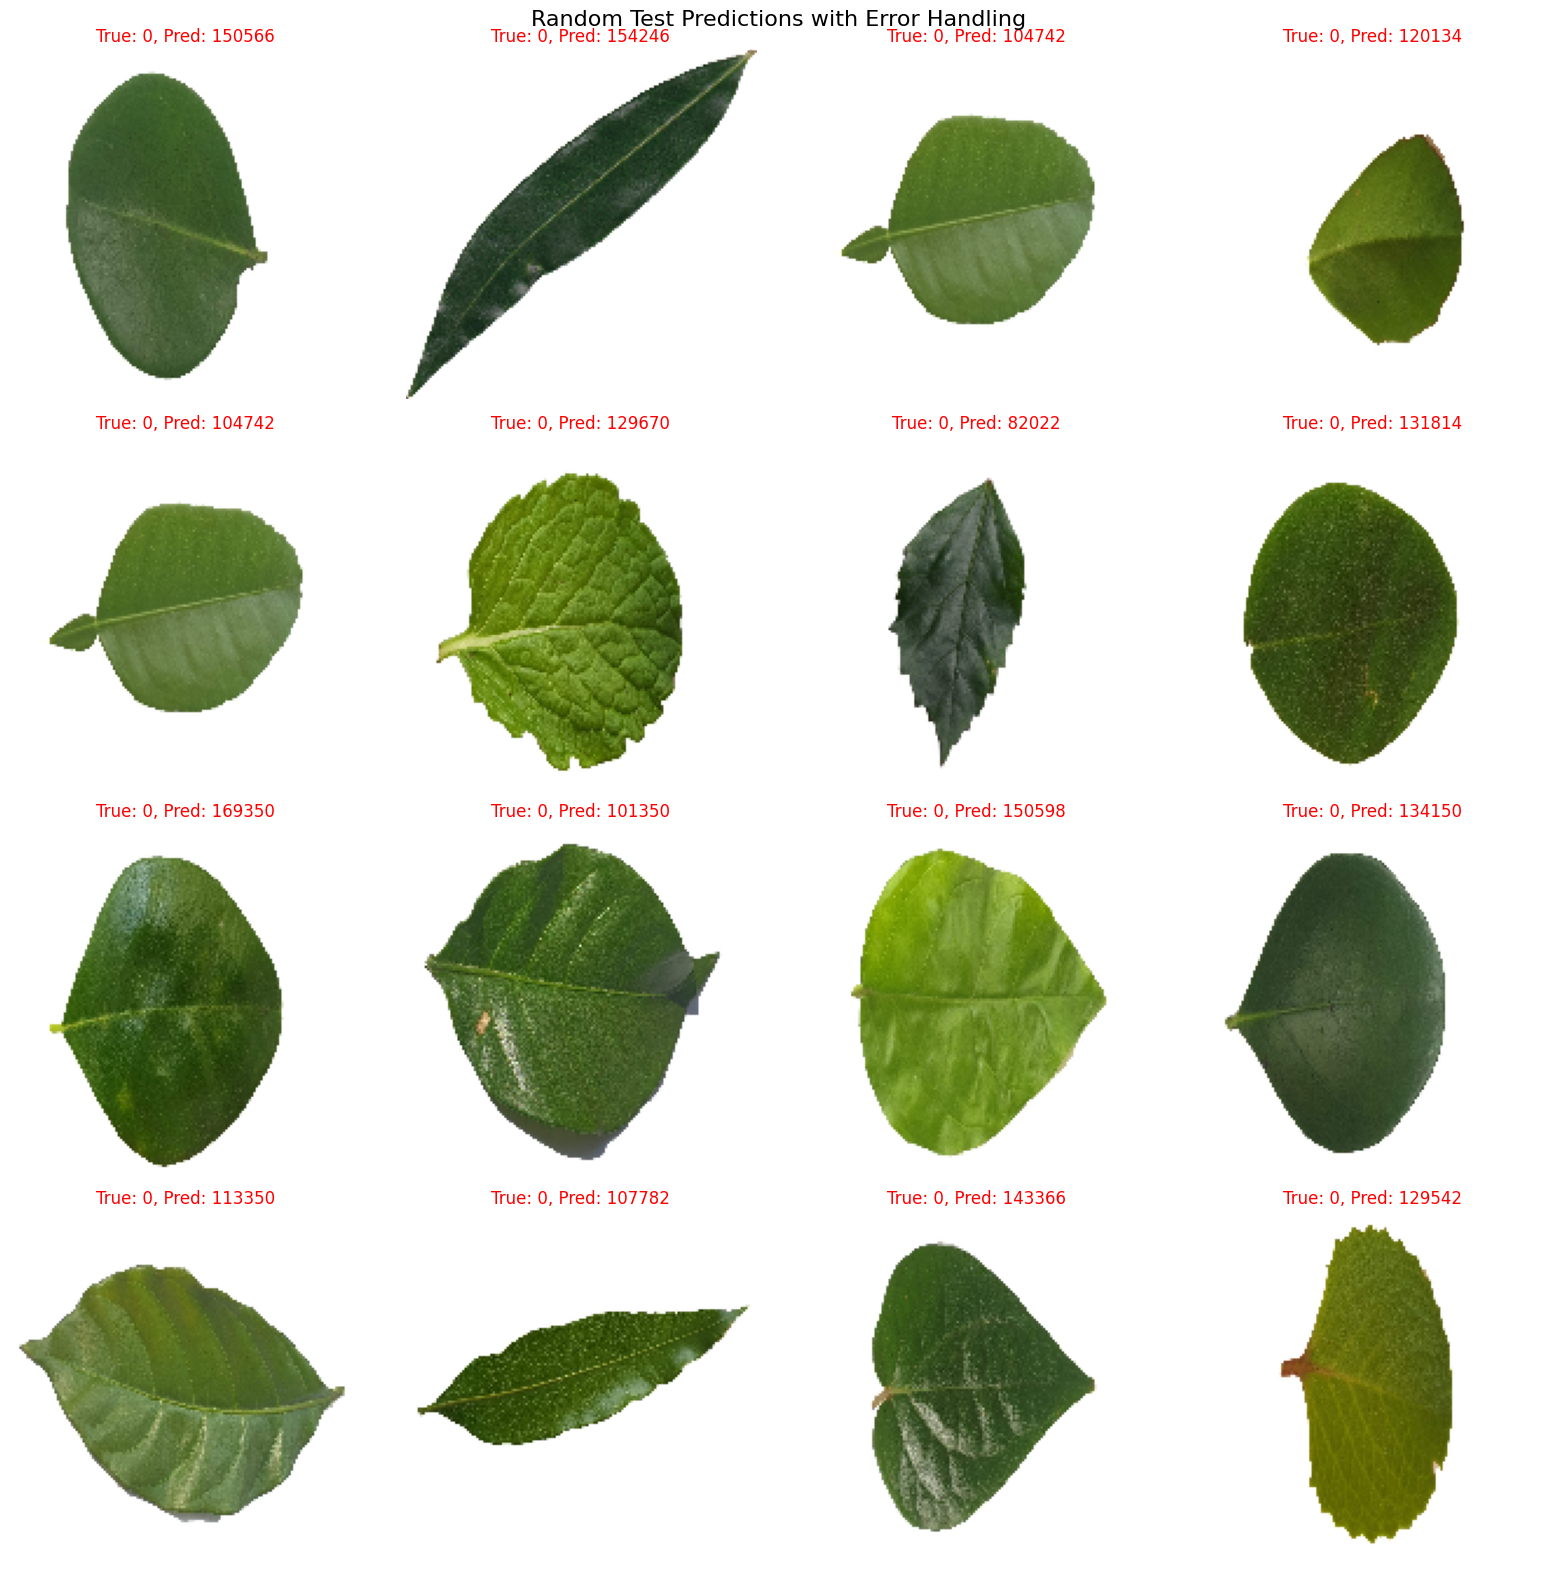

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_errors(X_test, y_test, predictions):
    if predictions is None:
        return

    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    fig.suptitle('Random Test Predictions with Error Handling', fontsize=16)

    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(len(X_test))
        ax.imshow(X_test[idx])
        ax.axis('off')

        if y_test[idx] is not None and predictions[idx] is not None:
            true_label = np.argmax(y_test[idx])
            pred_label = np.argmax(predictions[idx])
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)
        else:
            ax.set_title("Prediction Error")

    plt.tight_layout()
    plt.show()

# Example usage
visualize_errors(X_test, y_test, predicted_values)


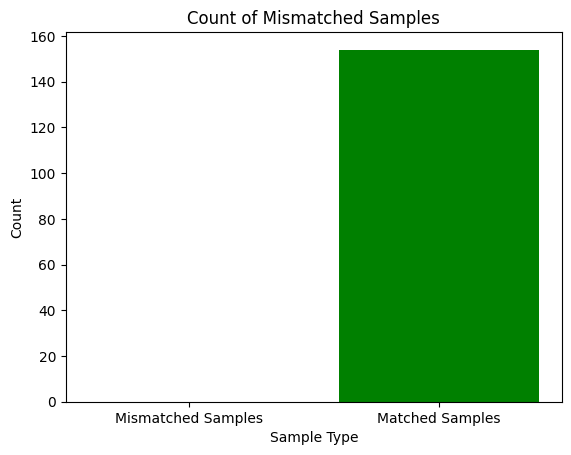

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have X_test and y_test as your test data

# Calculate the number of samples with mismatched shapes
mismatch_count = abs(len(X_test) - len(y_test))

# Create labels for the bar plot
labels = ['Mismatched Samples', 'Matched Samples']
counts = [mismatch_count, len(X_test) - mismatch_count]

# Plot the bar graph
plt.bar(labels, counts, color=['red', 'green'])

# Add labels and title
plt.xlabel('Sample Type')
plt.ylabel('Count')
plt.title('Count of Mismatched Samples')

# Show plot
plt.show()

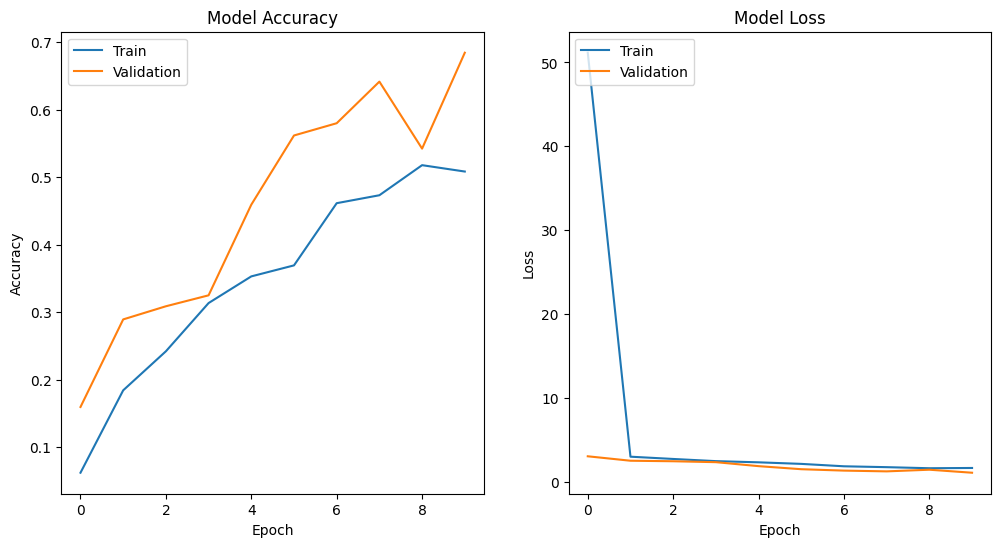

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Usage:
plot_training_history(history)

In [ ]:
def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None

# Example usage
image_path = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-001.jpg"
image_path1 = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-002.jpg"
image_path2 = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-003.jpg"
target_shape = (150, 150, 3)
preprocessed_image = preprocess_image(image_path, target_shape)
if preprocessed_image is not None:
    print("Image preprocessed successfully.")
else:
    print("Failed to preprocess image.")

Image preprocessed successfully.


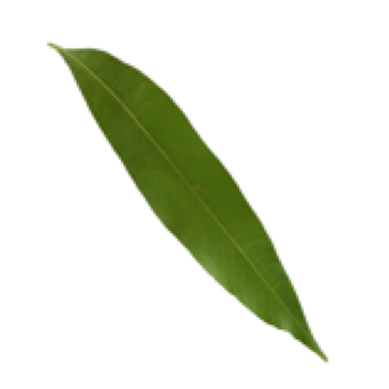

In [ ]:
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None

# Example usage
image_path = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-001.jpg"
target_shape = (150, 150, 3)
preprocessed_image = preprocess_image(image_path, target_shape)
if preprocessed_image is not None:
    plt.imshow(preprocessed_image)
    plt.axis('off')
    plt.show()
else:
    print("Failed to preprocess image.")

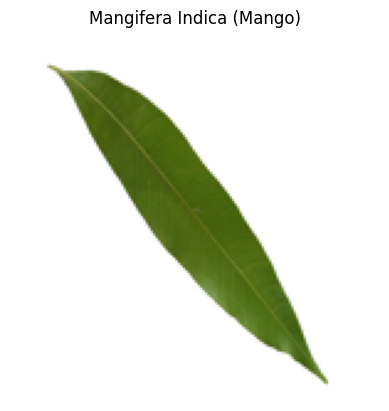

In [ ]:
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None

# Example usage
image_path = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-001.jpg"
target_shape = (150, 150, 3)
preprocessed_image = preprocess_image(image_path, target_shape)
if preprocessed_image is not None:
    # Get the folder name containing the image
    folder_name = os.path.basename(os.path.dirname(image_path))

    # Display the image with the folder name as title
    plt.imshow(preprocessed_image)
    plt.title(folder_name)
    plt.axis('off')
    plt.show()
else:
    print("Failed to preprocess image.")

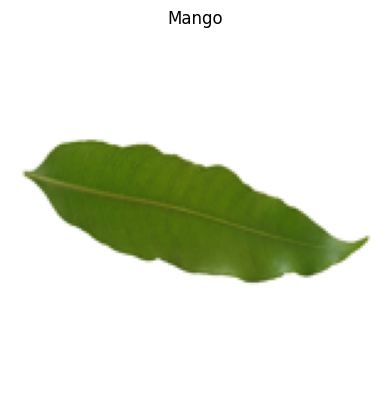

In [ ]:
import os
import re
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None

def extract_folder_name(folder_path):
    match = re.search(r'\((.*?)\)', folder_path)
    if match:
        return match.group(1)
    else:
        return folder_path

# Example usage
image_path = "/content/drive/MyDrive/Leafs/Mangifera Indica (Mango)/MI-S-005.jpg"
target_shape = (150, 150, 3)
preprocessed_image = preprocess_image(image_path, target_shape)
if preprocessed_image is not None:
    # Get the folder name containing the image
    folder_name = os.path.basename(os.path.dirname(image_path))

    # Extract only the name from the folder name
    name_from_brackets = extract_folder_name(folder_name)

    # Display the image with the extracted name as title
    plt.imshow(preprocessed_image)
    plt.title(name_from_brackets)
    plt.axis('off')
    plt.show()
else:
    print("Failed to preprocess image.")

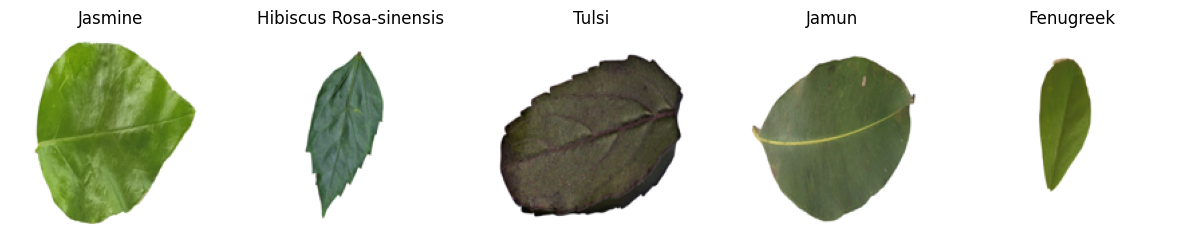

In [ ]:
import os
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_shape):
    try:
        image = Image.open(image_path)  # Open image using correct path
        image = image.resize(target_shape[:2])  # Resize to match width and height
        image = np.array(image)  # Convert to numpy array
        return image
    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None

def extract_folder_name(folder_path):
    match = re.search(r'\((.*?)\)', folder_path)
    if match:
        return match.group(1)
    else:
        return folder_path

def preprocess_images(image_paths, target_shape):
    preprocessed_images = []
    for image_path in image_paths:
        preprocessed_image = preprocess_image(image_path, target_shape)
        if preprocessed_image is not None:
            preprocessed_images.append(preprocessed_image)
    return preprocessed_images

def visualize_images(image_paths, target_shape):
    preprocessed_images = preprocess_images(image_paths, target_shape)
    num_images = len(preprocessed_images)
    if num_images == 0:
        print("No images to visualize.")
        return

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, (image, image_path) in enumerate(zip(preprocessed_images, image_paths)):
        folder_name = os.path.basename(os.path.dirname(image_path))
        name_from_brackets = extract_folder_name(folder_name)
        axes[i].imshow(image)
        axes[i].set_title(name_from_brackets)
        axes[i].axis('off')
    plt.show()

# Example usage
image_paths = ["/content/drive/MyDrive/Leafs/Jasminum (Jasmine)/J-S-014.jpg", "/content/drive/MyDrive/Leafs/Hibiscus Rosa-sinensis/HR-S-006.jpg", "/content/drive/MyDrive/Leafs/Ocimum Tenuiflorum (Tulsi)/OT-S-004.jpg", "/content/drive/MyDrive/Leafs/Syzygium Cumini (Jamun)/SC-S-007.jpg","/content/drive/MyDrive/Leafs/Trigonella Foenum-graecum (Fenugreek)/TF-S-009.jpg"]
target_shape = (150, 150, 3)
visualize_images(image_paths, target_shape)